## Model learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras import regularizers

In [2]:
X_train, X_test, Y_train, Y_test = np.load('./data/book_data_cat6_max_196_wordsize_218318.npy', allow_pickle=True)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(32788, 196)
(8198, 196)
(32788, 6)
(8198, 6)


In [2]:
model = Sequential()
model.add(Embedding(218318, 100, input_length=196)) 
model.add(Conv1D(32, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPool1D(pool_size=1))
model.add(Dropout(0.7))
model.add(LSTM(32, activation='tanh', return_sequences=True))  
model.add(Dropout(0.7))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(6, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 196, 100)          21831800  
_________________________________________________________________
conv1d (Conv1D)              (None, 196, 32)           16032     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 196, 32)           0         
_________________________________________________________________
dropout (Dropout)            (None, 196, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 196, 32)           8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 196, 32)           0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [4]:
# early_stopping = tf.keras.callbacks.EarlyStopping(moniter='val_accuracy', patience=5)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
fit_hist = model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test, Y_test))


Train on 32788 samples, validate on 8198 samples
Epoch 1/5
32788/32788 [==============================] - 278s 8ms/sample - loss: 1.0130 - accuracy: 0.6111 - val_loss: 0.4679 - val_accuracy: 0.8446
Epoch 2/5
32788/32788 [==============================] - 275s 8ms/sample - loss: 0.5575 - accuracy: 0.8100 - val_loss: 0.4401 - val_accuracy: 0.8507
Epoch 3/5
32788/32788 [==============================] - 276s 8ms/sample - loss: 0.3906 - accuracy: 0.8674 - val_loss: 0.4965 - val_accuracy: 0.8611
Epoch 4/5
32788/32788 [==============================] - 277s 8ms/sample - loss: 0.2972 - accuracy: 0.8985 - val_loss: 0.5981 - val_accuracy: 0.8467
Epoch 5/5
32788/32788 [==============================] - 277s 8ms/sample - loss: 0.2362 - accuracy: 0.9178 - val_loss: 0.7427 - val_accuracy: 0.8470


In [5]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('Loss : ', score[0])
print('Accuracy : ', score[1])

no = round(score[1], 4)

8198/8198 [==============================] - 2s 266us/sample - loss: 0.7427 - accuracy: 0.8470
Evaluation loss : 0.7426667352172697
Evaluation accuracy : 0.8470359


In [ ]:
import os
os.mkdir('./model/model_{}'.format(no))

plt.subplot(121)
plt.plot(fit_hist.history['val_loss'], label='val_loss')
plt.plot(fit_hist.history['loss'], label='loss')
plt.legend()
plt.title('Loss & Val_loss')

plt.subplot(122)
plt.plot(fit_hist.history['val_accuracy'], label='val_acc')
plt.plot(fit_hist.history['accuracy'], label='acc')
plt.legend()
plt.title('Acc & Val_acc')

plt.savefig('./model/model_{}/model_{}_graph.png'.format(no, no))

model.save('./model/model_{}/books_model_CM1+LD1+D4_ACC_{}.h5'.format(no, no))

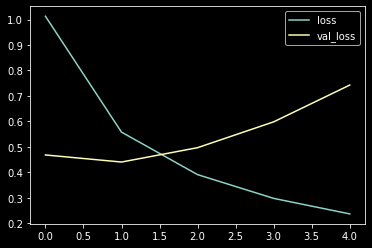

In [9]:
# # 그래프
# plt.plot(fit_hist.history['loss'], label='loss')
# plt.plot(fit_hist.history['val_loss'], label='val_loss')
# plt.legend()
# plt.show()

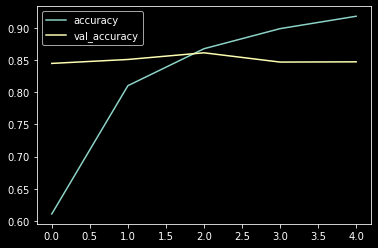

In [10]:
# plt.plot(fit_hist.history['accuracy'], label='accuracy')
# plt.plot(fit_hist.history['val_accuracy'], label='val_accuracy')
# plt.legend()
# plt.show()

In [11]:
# 모델 저장
# model.save('./model/book_classification_{}.h5'.format(score[1]))